In [1]:
from pymongo import MongoClient
import gridfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import seaborn as sns
sns.set(context='paper', style='whitegrid', font_scale=1.75)
from visualize import *

In [2]:
dirname = '../figures/'
#os.makedirs(dirname, exist_ok=True)
save_figs = True
def save(n, ext='.pdf', save_figs=True, **kwargs):
    if save_figs==True:
        kwargs.setdefault('bbox_inches', 'tight')
        kwargs.setdefault('pad_inches', 0)
        kwargs.setdefault('transparent', True)
        plt.savefig(os.path.join(dirname, n + ext), **kwargs)


In [3]:
exp_path = '/nfs/data/michaela/projects/OptSync/'
res_path = {
    'MMD+guassian+noise':exp_path+'2077_new_exp',
    'MMD+gaussianquaternion+noise':exp_path+'2078_new_exp',
    'MMD+laplacequaternion':exp_path+'2079_new_exp',
    'MMD+gaussian':exp_path+'2080_new_exp',
    'MMD+laplacequaternion+noise':exp_path+'2081_new_exp',
    'MMD+gaussianquaternion':exp_path+'2082_new_exp',
}
colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]

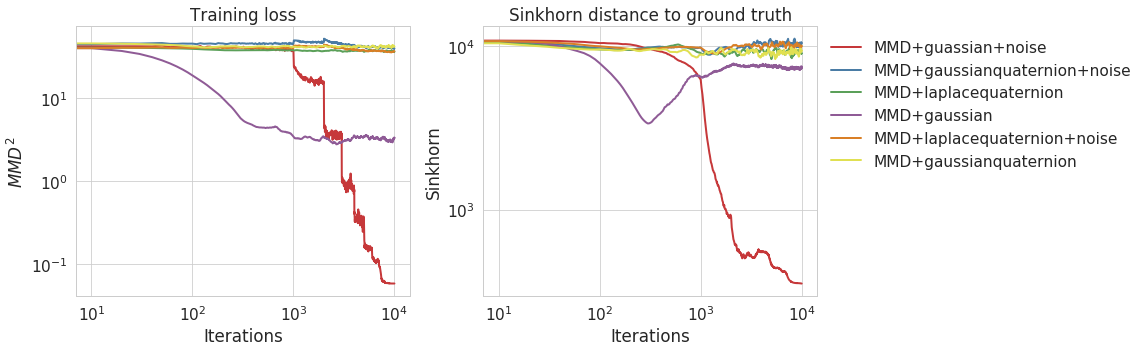

In [11]:
num_fig = 2
fig, ax = plt.subplots(1,num_fig, figsize=(8*num_fig,5))

value = 'loss'
xaxis = 'iteration'
refresh=  False
plot_from_dict(ax[0],xaxis, value, res_path, color_dict,refresh=refresh)
ax[0].set_title('Training loss')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$MMD^2$')
ax[0].set_xlabel('Iterations')
#ax[0].legend()

value = 'eval_dist'
xaxis = 'iteration'
plot_from_dict(ax[1],xaxis,  value, res_path, color_dict,refresh=refresh)
ax[1].set_title('Sinkhorn distance to ground truth')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel('Sinkhorn')
ax[1].set_xlabel('Iterations')
ax[1].legend(bbox_to_anchor=(1., 1.),frameon=False)
fig.tight_layout()
filename = 'loss_toy_data'
save(filename)


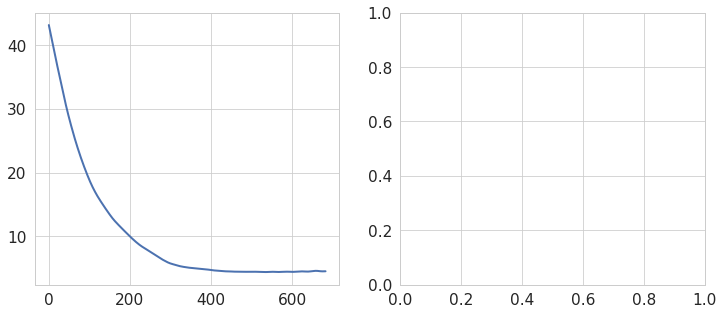

In [11]:
num_fig = 2
fig, ax = plt.subplots(1,num_fig, figsize=(6*num_fig,5))
value = 'loss'
ax[0].plot(res_dicts['MMD'][value], lw=2., label='MMD',color = color_dict['MMD'])
